# Importing Libraries

To achieve this analysis, I imported a few of the standard data science libraries.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Data

The link https://www.kaggle.com/gmadevs/atp-matches-dataset contains csv files for all of the tennis matches that took place on the ATP World Tour from 2000-2017. However, I only wanted to focus on the first decade of Novak Djokovic's career (2005-2015). In order to compile all of his match data in his first 11 seasons, I used a for-loop to append specific csv files onto a list, concatenated that list, created an empty dataframe, and populated that dataframe with the concatenated list.

In [232]:
prefix = '/Users/reneshbhamidipati/Udemy_Python/ATP_Matches/atp_matches_'
suffix = '.csv'

file_names = []
for i in range(2005, 2016):
    file_name = prefix + str(i) + suffix
    file_names.append(pd.read_csv(file_name))

atp_matches = pd.concat(file_names, ignore_index = True)

In [233]:
atp_matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2005-891,Chennai,Hard,32,A,20050103,1,102845,1.0,NaN,...,1.0,4.0,3.0,70.0,43.0,31.0,14.0,11.0,2.0,4.0
1,2005-891,Chennai,Hard,32,A,20050103,2,102730,NaN,NaN,...,4.0,3.0,3.0,65.0,38.0,22.0,17.0,10.0,4.0,6.0
2,2005-891,Chennai,Hard,32,A,20050103,3,103908,NaN,NaN,...,2.0,7.0,2.0,45.0,24.0,18.0,11.0,9.0,0.0,2.0
3,2005-891,Chennai,Hard,32,A,20050103,4,102202,5.0,NaN,...,0.0,5.0,4.0,71.0,50.0,37.0,9.0,11.0,1.0,2.0
4,2005-891,Chennai,Hard,32,A,20050103,5,103535,NaN,NaN,...,2.0,1.0,6.0,77.0,41.0,23.0,11.0,8.0,10.0,16.0


# Filtering and Modifying the Data

The objective of my analysis is to focus on Novak Djokovic's career, so I created a variable that filters through the dataframe based on his wins, losses, and overall matches played. I also modified the tournament date column in the dataframe because it was being represented as an integer, when in reality it should be displayed as a date. This will allow me to use the year as a metric when creating visualizations.

In [234]:
player_name = 'Novak Djokovic'

df_novak = atp_matches.loc[(atp_matches['winner_name'] == player_name)|(atp_matches['loser_name'] == player_name)].copy()
df_novak_win = atp_matches.loc[(atp_matches['winner_name'] == player_name)].copy()
df_novak_loss = atp_matches.loc[(atp_matches['loser_name'] == player_name)].copy()

df_novak.loc[:,'tourney_date'] = pd.to_datetime(df_novak_win['tourney_date'], format='%Y%m%d')
df_novak_win.loc[:,'tourney_date'] = pd.to_datetime(df_novak_win['tourney_date'], format='%Y%m%d')
df_novak_loss.loc[:,'tourney_date'] = pd.to_datetime(df_novak_loss['tourney_date'], format='%Y%m%d')

In [235]:
df_novak.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
33443,2015-605,Tour Finals,Hard,8,F,NaT,6,103819,3.0,NaN,...,9.0,5.0,0.0,56.0,37.0,23.0,16.0,9.0,2.0,2.0
33447,2015-605,Tour Finals,Hard,8,F,2015-11-15,10,104925,1.0,NaN,...,2.0,10.0,2.0,59.0,35.0,25.0,7.0,10.0,8.0,12.0
33450,2015-605,Tour Finals,Hard,8,F,2015-11-15,14,104925,1.0,NaN,...,0.0,3.0,0.0,53.0,37.0,20.0,11.0,9.0,2.0,5.0
33452,2015-605,Tour Finals,Hard,8,F,2015-11-15,15,104925,1.0,NaN,...,2.0,6.0,2.0,59.0,38.0,27.0,9.0,10.0,6.0,9.0
33488,2015-D006,Davis Cup WG R1: SRB vs CRO,Hard,4,D,2015-03-06,1,104925,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df_novak_win.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
33438,2015-605,Tour Finals,Hard,8,F,2015-11-15,1,104925,1.0,NaN,...,0.0,3.0,3.0,53.0,28.0,12.0,11.0,7.0,4.0,9.0
33447,2015-605,Tour Finals,Hard,8,F,2015-11-15,10,104925,1.0,NaN,...,2.0,10.0,2.0,59.0,35.0,25.0,7.0,10.0,8.0,12.0
33450,2015-605,Tour Finals,Hard,8,F,2015-11-15,14,104925,1.0,NaN,...,0.0,3.0,0.0,53.0,37.0,20.0,11.0,9.0,2.0,5.0
33452,2015-605,Tour Finals,Hard,8,F,2015-11-15,15,104925,1.0,NaN,...,2.0,6.0,2.0,59.0,38.0,27.0,9.0,10.0,6.0,9.0
33488,2015-D006,Davis Cup WG R1: SRB vs CRO,Hard,4,D,2015-03-06,1,104925,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df_novak_loss.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
31347,2015-421,Canada Masters,Hard,56,M,2015-08-10,55,104918,2.0,NaN,...,14.0,5.0,2.0,106.0,64.0,42.0,20.0,14.0,15.0,19.0
31846,2015-495,Dubai,Hard,32,A,2015-02-23,31,103819,2.0,NaN,...,7.0,1.0,2.0,62.0,39.0,27.0,12.0,10.0,0.0,2.0
32941,2015-451,Doha,Hard,32,A,2015-01-05,25,103333,7.0,NaN,...,0.0,11.0,2.0,112.0,81.0,61.0,19.0,17.0,3.0,4.0
33437,2015-520,Roland Garros,Clay,128,G,2015-05-24,127,104527,8.0,NaN,...,10.0,6.0,0.0,128.0,83.0,52.0,24.0,19.0,11.0,15.0
33443,2015-605,Tour Finals,Hard,8,F,2015-11-15,6,103819,3.0,NaN,...,9.0,5.0,0.0,56.0,37.0,23.0,16.0,9.0,2.0,2.0


# Tracking Novak's Progress, Season-by-Season

In order to track Novak's progress in the ATP rankings, I compared his W/L record each season to his average rank each season. A side-by-side visual representation of these two parameters would allow us to see the correlation between Novak's success and his ranking.

In [238]:
years = []
for i in range(5,16):
    years.append(i+2000)
    
annual_wins = df_novak_win.groupby(df_novak_win.tourney_date.dt.year).count().tourney_id
annual_losses = df_novak_loss.groupby(df_novak_loss.tourney_date.dt.year).count().tourney_id
average_rank = df_novak.groupby(df_novak.tourney_date.dt.year).mean().winner_rank

In [239]:
annual_wins.head()

tourney_date
2005    11
2006    40
2007    68
2008    64
2009    78
Name: tourney_id, dtype: int64

In [240]:
annual_losses.head()

tourney_date
2005    11
2006    18
2007    19
2008    17
2009    19
Name: tourney_id, dtype: int64

In [241]:
average_rank.head()

tourney_date
2005.0    116.181818
2006.0     43.600000
2007.0      7.514706
2008.0      3.000000
2009.0      3.410256
Name: winner_rank, dtype: float64

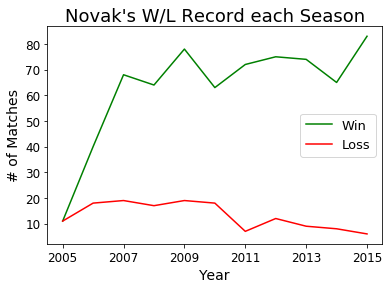

In [317]:
plt.title("Novak's W/L Record each Season", fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.xticks(np.arange(2005,2016,2), fontsize = 12)
plt.ylabel('# of Matches', fontsize = 14)
plt.yticks(np.arange(0,120,10), fontsize = 12)
plt.plot(years,annual_wins,label = 'Win', color = 'Green')
plt.plot(years,annual_losses,label = 'Loss', color = 'Red')
plt.legend(fontsize = 13);

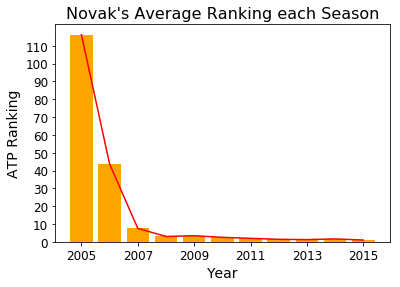

In [319]:
plt.title("Novak's Average Ranking each Season", fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.xticks(np.arange(2005,2016,2), fontsize = 12)
plt.ylabel('ATP Ranking', fontsize = 14)
plt.yticks(np.arange(0,120,10), fontsize = 12)
plt.bar(years, average_rank, color = 'orange');
plt.plot(years,average_rank, color = 'red');

After looking at the graphs, we can see that even though Novak Djokovic turned pro in 2005, he established himself as a tough competitor right from the beginning. He cracked the Top 10 in 2007, became the World no. 1 in 2011, and managed to stay in the Top 5 from 2008 onwards. 

# Exactly how good was Novak in 2011 and 2015?

From the line graph depicting Novak's W/L record (above), it is valid to assume that 2011 and 2015 were perhaps the best years of his career due to his astounding winning percentage and limited losses in those respective seasons. 

I wanted to analyze his prime seasons a little further, so I made a copy of the 2011 and 2015 csv files, created an additional column to include the year of that particular season, and merged the data into a new dataframe. This will help me conduct a side-by-side comparison of Novak's 2011 and 2015 seasons using a variety of parameters.

In [309]:
atp_matches_2011 = pd.read_csv('/Users/reneshbhamidipati/Udemy_Python/ATP_Matches/atp_matches_2011_copy.csv')
atp_matches_2015 = pd.read_csv('/Users/reneshbhamidipati/Udemy_Python/ATP_Matches/atp_matches_2015_copy.csv')
df_merged = pd.concat([
    atp_matches_2011,
    atp_matches_2015,
],ignore_index = True)

In [310]:
df_merged.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
0,2011-440,s-Hertogenbosch,Grass,32,A,20110612,1,103582,NaN,NaN,...,15.0,4.0,87.0,48.0,41.0,27.0,16.0,3.0,4.0,2011
1,2011-440,s-Hertogenbosch,Grass,32,A,20110612,2,105053,NaN,NaN,...,5.0,1.0,70.0,45.0,31.0,11.0,10.0,2.0,4.0,2011
2,2011-440,s-Hertogenbosch,Grass,32,A,20110612,3,104098,NaN,NaN,...,7.0,3.0,59.0,34.0,21.0,14.0,10.0,3.0,6.0,2011
3,2011-440,s-Hertogenbosch,Grass,32,A,20110612,4,103917,NaN,NaN,...,1.0,5.0,65.0,39.0,26.0,11.0,11.0,1.0,5.0,2011
4,2011-440,s-Hertogenbosch,Grass,32,A,20110612,5,103598,3.0,NaN,...,0.0,2.0,47.0,25.0,13.0,8.0,8.0,6.0,11.0,2011


In [311]:
df_merged.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
5983,2015-D080,Davis Cup WG PO: BRA vs CRO,Clay,4,D,20150918,3,106432,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
5984,2015-D081,Davis Cup WG PO: POL vs SVK,Hard,4,D,20150918,1,105373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
5985,2015-D081,Davis Cup WG PO: POL vs SVK,Hard,4,D,20150918,2,105668,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
5986,2015-D081,Davis Cup WG PO: POL vs SVK,Hard,4,D,20150918,3,105373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
5987,2015-D081,Davis Cup WG PO: POL vs SVK,Hard,4,D,20150918,4,104308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


After merging all of the tennis matches take took place in 2011 & 2015, I created additional dataframes that display all of Novak's wins and losses in each respective year.

In [312]:
df_novakwin11 = df_merged.loc[(df_merged['winner_name'] == 'Novak Djokovic') & (df_merged['year'] == 2011)].copy()
df_novakloss11 = df_merged.loc[(df_merged['loser_name'] == 'Novak Djokovic') & (df_merged['year'] == 2011)].copy()

df_novakwin15 = df_merged.loc[(df_merged['winner_name'] == 'Novak Djokovic') & (df_merged['year'] == 2015)].copy()
df_novakloss15 = df_merged.loc[(df_merged['loser_name'] == 'Novak Djokovic') & (df_merged['year'] == 2015)].copy()

To analyze Novak's wins a bit further, I created a few more dataframes that breakdown how many matches he won on each surface in each respective year.

In [313]:
df_novak_hard11 = df_novakwin11.loc[df_novakwin11['surface'] == 'Hard'].copy()
df_novak_grass11 = df_novakwin11.loc[df_novakwin11['surface'] == 'Grass'].copy()
df_novak_clay11 = df_novakwin11.loc[df_novakwin11['surface'] == 'Clay'].copy()

df_novak_hard15 = df_novakwin15.loc[df_novakwin15['surface'] == 'Hard'].copy()
df_novak_grass15 = df_novakwin15.loc[df_novakwin15['surface'] == 'Grass'].copy()
df_novak_clay15 = df_novakwin15.loc[df_novakwin15['surface'] == 'Clay'].copy()

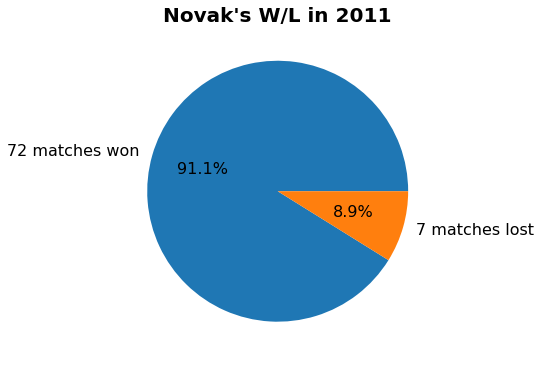

In [314]:
fig = plt.figure(figsize = (6,6))
plt.title("Novak's W/L in 2011", fontsize = 20, fontweight = "bold")
plt.pie([df_novakwin11.count()[0], df_novakloss11.count()[0]], labels = ['%d matches won' % df_novakwin11.count()[0], '%d matches lost' % df_novakloss11.count()[0]], textprops = {'fontsize': 16}, autopct='%1.1f%%');

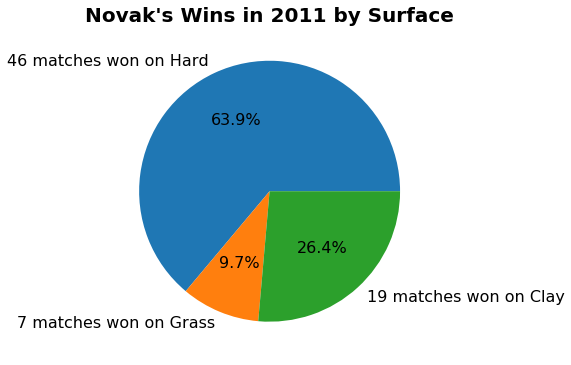

In [315]:
fig = plt.figure(figsize = (6,6))
plt.title("Novak's Wins in 2011 by Surface", fontsize = 20, fontweight = "bold")
plt.pie([df_novak_hard11.count()[0], df_novak_grass11.count()[0], df_novak_clay11.count()[0]], labels = ['%d matches won on Hard' % df_novak_hard11.count()[0], '%d matches won on Grass' % df_novak_grass11.count()[0], '%d matches won on Clay' % df_novak_clay11.count()[0]], textprops = {'fontsize': 16}, autopct='%1.1f%%');

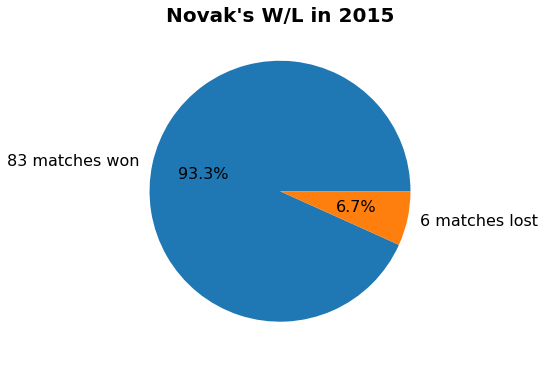

In [251]:
fig = plt.figure(figsize = (6,6))
plt.title("Novak's W/L in 2015", fontsize = 20, fontweight = "bold")
plt.pie([df_novakwin15.count()[0], df_novakloss15.count()[0]], labels = ['%d matches won' % df_novakwin15.count()[0], '%d matches lost' % df_novakloss15.count()[0]], textprops = {'fontsize': 16}, autopct='%1.1f%%');

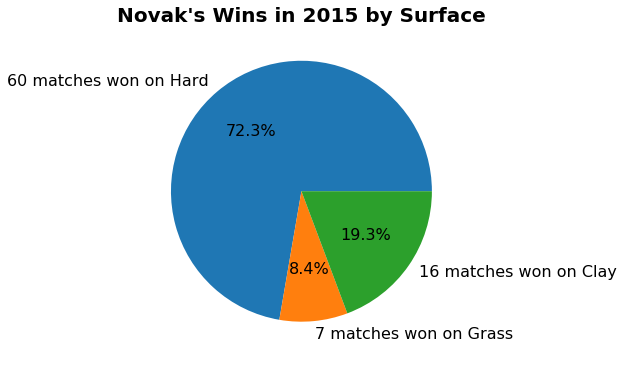

In [252]:
fig = plt.figure(figsize = (6,6))
plt.title("Novak's Wins in 2015 by Surface", fontsize = 20, fontweight = "bold")
plt.pie([df_novak_hard15.count()[0], df_novak_grass15.count()[0], df_novak_clay15.count()[0]], labels = ['%d matches won on Hard' % df_novak_hard15.count()[0], '%d matches won on Grass' % df_novak_grass15.count()[0], '%d matches won on Clay' % df_novak_clay15.count()[0]], textprops = {'fontsize': 16}, autopct='%1.1f%%');

From the pie charts above, we can see Novak had a slightly better winning percentage in his 2015 season than in 2011, while managing to play 10 more matches. Given that Novak won the same amount of grass court matches in both years and approximately the same on clay as well, we can conclude that he was more dominant on hard courts in 2015. Overall, these visualizations suggest that Novak's 2015 season was his best season ever... or was it?

In order to conclude that 2015 was Novak's best season, we would have to compare the amount of grand slams that he won in 2011 & 2015. If he won more grand slams in 2015 OR won the same amount in both years, then it would be fair to assume that '15 Djokovic was slightly better from a numbers standpoint.

If you take a look at Novak's grass court seasons in 2011 and 2015 (below), you'll see that he won the same amount of grass court matches (as shown in the pie charts earlier) because he only played in one tournament (Wimbledon- a grand slam tournament) both years. 

What does this mean? It means that he won a grand slam at Wimbledon in both 2011 and 2015, so we need to examine his results in the other 3 grand slams. 

In [253]:
df_novak_grass11

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
965,2011-540,Wimbledon,Grass,128,G,20110620,64,104925,2.0,NaN,...,9.0,2.0,75.0,44.0,30.0,8.0,12.0,4.0,10.0,2011
997,2011-540,Wimbledon,Grass,128,G,20110620,96,104925,2.0,NaN,...,8.0,3.0,72.0,50.0,30.0,9.0,13.0,4.0,9.0,2011
1013,2011-540,Wimbledon,Grass,128,G,20110620,112,104925,2.0,NaN,...,14.0,4.0,132.0,70.0,51.0,33.0,19.0,8.0,11.0,2011
1021,2011-540,Wimbledon,Grass,128,G,20110620,120,104925,2.0,NaN,...,8.0,7.0,82.0,44.0,32.0,16.0,13.0,7.0,11.0,2011
1025,2011-540,Wimbledon,Grass,128,G,20110620,124,104925,2.0,NaN,...,7.0,2.0,144.0,94.0,59.0,24.0,19.0,9.0,15.0,2011
1027,2011-540,Wimbledon,Grass,128,G,20110620,126,104925,2.0,NaN,...,12.0,5.0,133.0,90.0,61.0,20.0,20.0,6.0,12.0,2011
1028,2011-540,Wimbledon,Grass,128,G,20110620,127,104925,2.0,NaN,...,5.0,1.0,82.0,64.0,43.0,8.0,16.0,1.0,6.0,2011


In [254]:
df_novak_grass15

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
3346,2015-540,Wimbledon,Grass,128,G,20150629,1,104925,1.0,NaN,...,6.0,4.0,103.0,66.0,42.0,17.0,15.0,7.0,12.0,2015
3410,2015-540,Wimbledon,Grass,128,G,20150629,65,104925,1.0,NaN,...,2.0,2.0,87.0,59.0,36.0,12.0,13.0,9.0,14.0,2015
3442,2015-540,Wimbledon,Grass,128,G,20150629,97,104925,1.0,NaN,...,9.0,2.0,82.0,54.0,33.0,15.0,13.0,9.0,13.0,2015
3458,2015-540,Wimbledon,Grass,128,G,20150629,113,104925,1.0,NaN,...,40.0,8.0,168.0,98.0,81.0,29.0,26.0,3.0,8.0,2015
3466,2015-540,Wimbledon,Grass,128,G,20150629,121,104925,1.0,NaN,...,8.0,0.0,83.0,46.0,35.0,18.0,15.0,2.0,5.0,2015
3470,2015-540,Wimbledon,Grass,128,G,20150629,125,104925,1.0,NaN,...,6.0,6.0,113.0,58.0,38.0,30.0,16.0,5.0,8.0,2015
3472,2015-540,Wimbledon,Grass,128,G,20150629,127,104925,1.0,NaN,...,14.0,3.0,141.0,94.0,70.0,23.0,22.0,6.0,10.0,2015


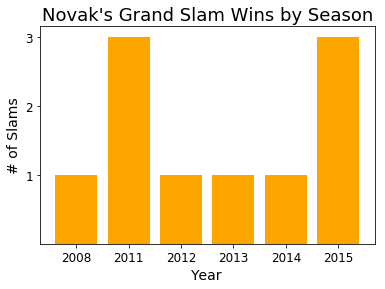

In [322]:
novak_slams = df_novak_win.loc[df_novak_win.tourney_level == 'G'].groupby(df_novak_win.tourney_id).count()
novak_slams_won = novak_slams.loc[novak_slams.tourney_id == 7]
plt.title("Novak's Grand Slam Wins by Season", fontsize = 18)
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14)
plt.yticks([1,2,3], fontsize = 12)
plt.ylabel('# of Slams', fontsize = 14)
grandslams = novak_slams_won.groupby(novak_slams_won.index.map(lambda x: x[0:4])).count()
plt.bar(grandslams.index,grandslams.tourney_id, color = 'Orange');

It is evident that Novak won 3 grand slams in both 2011 and 2015. Therefore, we can conclude that Novak had a better season in 2015 than he did in 2011 from a numbers standpoint.

# Novak vs. "Big 4" members

Towards the end of the 2000's and most of the 2010's, there were four players who were consistently winning the biggest tournaments on the ATP tour. The names of these men are: Roger Federer, Rafael Nadal, Andy Murray, and of course, Novak Djokovic. Their strong results in the Masters 1000 events and Grand Slams on a yearly basis have led tennis experts to declare the "Big 4" as arguably the greatest group of tennis players to ever play the sport. 

In this portion of the analysis, I will outline Novak's results over the other members of the "Big 4".


In [256]:
win = df_novak.loc[df_novak.winner_name == 'Novak Djokovic', ['loser_name']]
win.columns = ['Name']
win['Status'] = 'Win'
win.head()

,Name,Status
518,Robby Ginepri,Win
899,Victor Hanescu,Win
915,Mariano Puerta,Win
1750,Juan Monaco,Win
1787,Guillermo Garcia Lopez,Win


In [257]:
loss = df_novak.loc[df_novak.winner_name != 'Novak Djokovic', ['winner_name']]
loss.columns = ['Name']
loss['Status'] = 'Loss'
loss.tail()

,Name,Status
31347,Andy Murray,Loss
31846,Roger Federer,Loss
32941,Ivo Karlovic,Loss
33437,Stanislas Wawrinka,Loss
33443,Roger Federer,Loss


In [258]:
novak_opponents = pd.concat([win,loss])
no_of_matches = novak_opponents.groupby('Name').count().sort_values('Status', ascending = False)
no_of_losses = novak_opponents.loc[novak_opponents.Status == 'Loss'].groupby('Name').count().sort_values('Status', ascending = False)

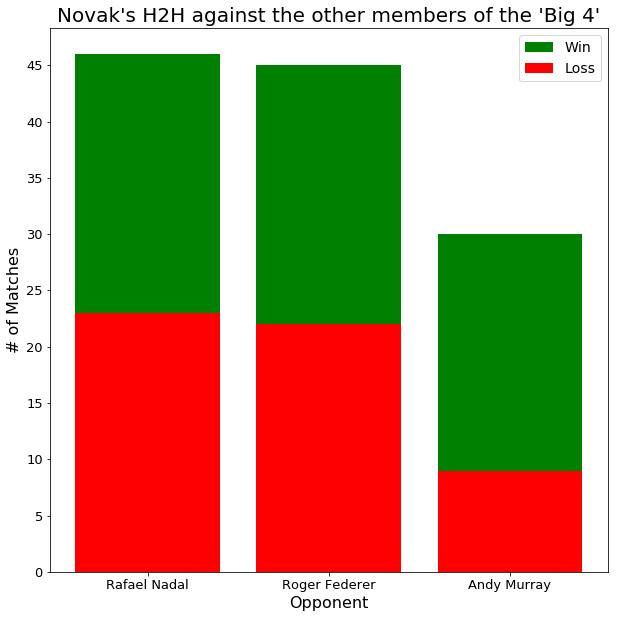

In [329]:
fig = plt.figure(figsize = (10,10))
plt.title("Novak's H2H against the other members of the 'Big 4'", fontsize = 20)
plt.xlabel('Opponent', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel("# of Matches", fontsize = 16)
plt.yticks(np.arange(0,50,5), fontsize = 13)
plt.bar(no_of_matches.index[0:3], no_of_matches.Status[0:3], label = 'Win', color = 'g');
plt.bar(no_of_losses.index[0:3], no_of_losses.Status[0:3], label = 'Loss', color = 'r');
plt.legend(fontsize = 14);

# Who is Novak Djokovic's Kryptonite?

The stacked bar chart above makes it clear that Novak was able to hold his ground against the other 3 members of the "Big 4." But this can't mean that he's invincible! So in the last portion of my analysis, I decided to take a look at which of Novak's opponents gave him the most trouble over the years.

In [262]:
novak_opponents_grouped = pd.DataFrame()
novak_opponents_grouped['Matches'] = no_of_matches.Status
novak_opponents_grouped['Wins'] = novak_opponents.loc[novak_opponents.Status == 'Win'].groupby('Name').count().Status
novak_opponents_grouped['Percentage'] = novak_opponents_grouped['Wins']/ novak_opponents_grouped['Matches']
novak_opponents_grouped.head()

,Matches,Wins,Percentage
Name,,,
Rafael Nadal,46,23.0,0.500000
Roger Federer,45,23.0,0.511111
Andy Murray,30,21.0,0.700000
Stanislas Wawrinka,23,19.0,0.826087
Tomas Berdych,23,21.0,0.913043


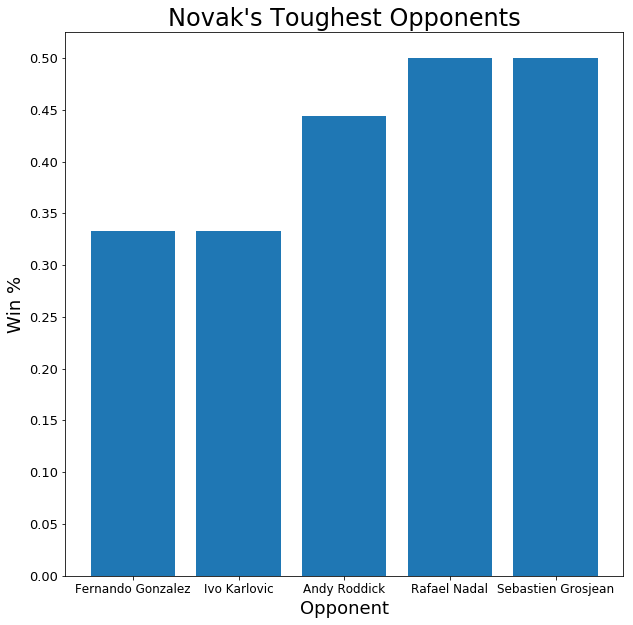

In [331]:
fig = plt.figure(figsize = (10,10))
plt.title("Novak's Toughest Opponents", fontsize = 24)
plt.xlabel('Opponent', fontsize = 18)
plt.xticks(fontsize = 12)
plt.ylabel("Win %", fontsize = 18)
plt.yticks(np.arange(0,0.55,0.05), fontsize = 13)
plt.bar(novak_opponents_grouped.sort_values('Percentage', ascending = True).index[0:5], novak_opponents_grouped.sort_values('Percentage', ascending = True).Percentage[0:5]);

Besides Rafael Nadal and Ivo Karlovic, the rest of the players displayed in the bar graph above retired by the end of 2012. This means that Novak played Andy Roddick, Fernando Gonzalez, and Sebastien Grosjean several times earlier on in his career before reaching his prime, while those guys were still in their prime or entering the later stages of their careers. It would have been interesting to see Novak play these guys when he entered his prime.

# Conclusion

After examining different aspects of Novak's career through these visualizations, there is no doubting that he is an absolute legend of the sport. His quick rise to the ATP rankings, impressive W/L and H2h records, astounding grand slam count, and overall consistency demonstrates an extremely high level of discipline and success that is very hard to emulate. 

It is a shame to see this 2020 season go to waste due to the coronavirus pandemic, but if vaccinations come out in early 2021 and the ATP Tour schedule goes back to normal, we may have the chance to witness Novak rewrite all of the record books and potentially enter the conversation as the greatest of all time.